In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Kaggle DBSCAN Clustering for Agricultural Factors
# -------------------------------------------------

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1️⃣ Load the dataset
# If you added the CSV in the Kaggle Data tab, it will be in /kaggle/input/<dataset-folder>/
# Update the path if your folder name differs
csv_path = "/kaggle/input/agricultural-factors-dataset-2/combined_district_data.csv"
df = pd.read_csv(csv_path)

# 2️⃣ Select relevant soil & rainfall columns
feature_cols = [
    "Average Soilmoisture Level (at 15cm)",
    "Aggregate Soilmoisture Percentage (at 15cm)",
    "Volume Soilmoisture percentage (at 15cm)",
    "Pre-Monsoon Actual (%)",
    "SWM Actual",
    "NEM Actual (mm)",
    "Total Actual (mm)"
]

# 3️⃣ Prepare data (drop rows with missing values in selected columns)
X = df[feature_cols].dropna()

# 4️⃣ Scale features for DBSCAN (distance-based algorithm)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Run DBSCAN
# Adjust eps and min_samples to tune cluster sensitivity
db = DBSCAN(eps=1.2, min_samples=3)
clusters = db.fit_predict(X_scaled)

# 6️⃣ Attach cluster labels to original rows used in clustering
clustered_df = df.loc[X.index].copy()
clustered_df["Cluster"] = clusters

# 7️⃣ Inspect results
print(clustered_df[["District", "Cluster"]].head(20))      # first 20 rows with cluster IDs
print("\nCluster distribution:\n", clustered_df["Cluster"].value_counts())

# 8️⃣ Save output to Kaggle working directory for download
clustered_df.to_csv("/kaggle/working/dbscan_clusters_output.csv", index=False)
print("\nClustered data saved to /kaggle/working/dbscan_clusters_output.csv")


            District  Cluster
0           Bagalkot        0
1            Ballari        0
2           Belagavi        0
3    Bengaluru Rural        0
4              Bidar        0
5     Chamarajanagar        0
6       Chikballapur        0
7     Chikkamagaluru       -1
8        Chitradurga        0
9   Dakshina Kannada       -1
10        Davanagere        0
11           Dharwad        0
12             Gadag        0
13            Hassan       -1
14            Haveri        0
15        Kalaburagi        0
16            Kodagu       -1
17             Kolar        0
18            Koppal        0
19            Mandya        0

Cluster distribution:
 Cluster
 0    21
-1     7
Name: count, dtype: int64

Clustered data saved to /kaggle/working/dbscan_clusters_output.csv


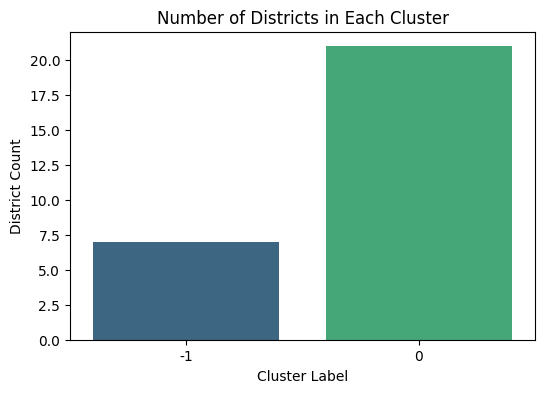

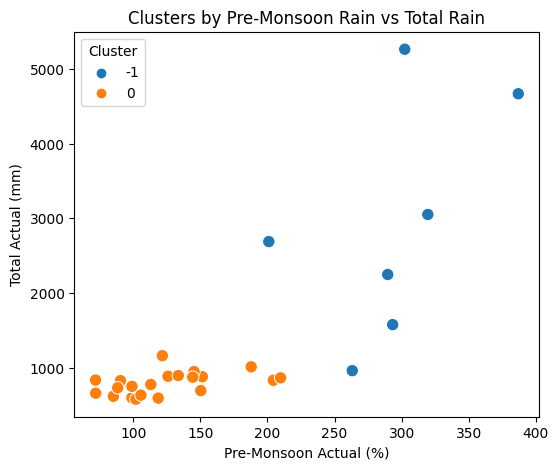

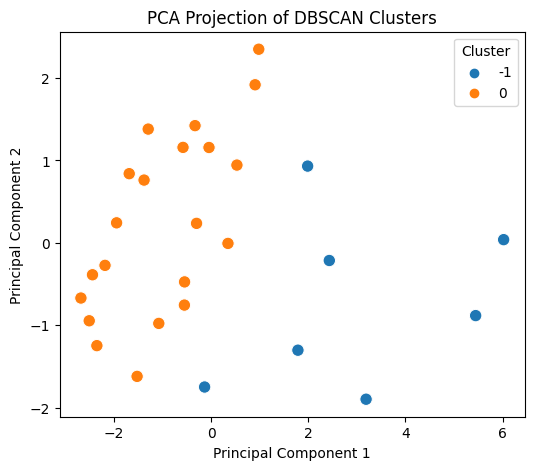

In [3]:
# 📊 Visualisations for DBSCAN Results
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Cluster count bar plot
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=clustered_df, palette="viridis")
plt.title("Number of Districts in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("District Count")
plt.show()

# 2️⃣ Pairplot of two key features, coloured by cluster
# Choose any two continuous features to visualise relationship
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="Pre-Monsoon Actual (%)",
    y="Total Actual (mm)",
    hue="Cluster",
    data=clustered_df,
    palette="tab10",
    s=80
)
plt.title("Clusters by Pre-Monsoon Rain vs Total Rain")
plt.xlabel("Pre-Monsoon Actual (%)")
plt.ylabel("Total Actual (mm)")
plt.legend(title="Cluster")
plt.show()

# 3️⃣ Optional: 2-D PCA projection of all features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1','PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(6,5))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Cluster",
    data=pca_df,
    palette="tab10",
    s=80
)
plt.title("PCA Projection of DBSCAN Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
